In [158]:
import optris_csv as ocsv
import temperaturemap as tmap
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, find_peaks, correlate
%matplotlib widget

matmap = tmap.maps["Al"]

In [159]:
data = ocsv.OptrisDataset("./edge 0-15mm+1mm, 6, 7, 8, 9W 80HZ.dat").build_array_data()
TIME_CUTOFF = 335
data = data[data["time"] <= TIME_CUTOFF]
# print(data.keys())

60


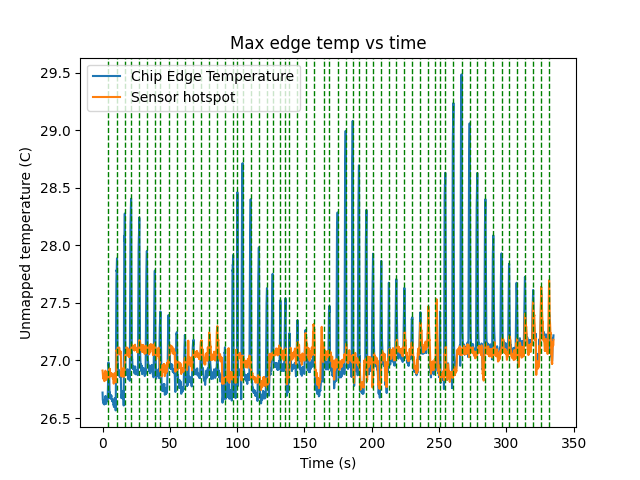

In [160]:
fig, ax = plt.subplots()
time = data["time"]


EDGEKEY = "Chip Edge Temperature"
LASEKEY = "ROI"

max_edge_temps = savgol_filter(data[EDGEKEY], 72, 4)
max_chip_temps = savgol_filter(data[LASEKEY], 72, 4)

peak_indices, peak_properties = find_peaks(max_edge_temps, height=26.88, distance=230, prominence=0.07)
# print([f"peak {ind} prom {prom}" for ind, prom in zip([x + 1 for x in range(len(peak_indices))], peak_properties["prominences"])])
ax.plot(time, max_edge_temps, label="Chip Edge Temperature")
ax.plot(time, max_chip_temps, label="Sensor hotspot")
ax.set_title("Max edge temp vs time")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Unmapped temperature (C)")

for index in peak_indices:
    ax.axvline(time[index], lw='1', c="green", linestyle="--")


print(len(peak_indices))

ax.legend()
plt.show()

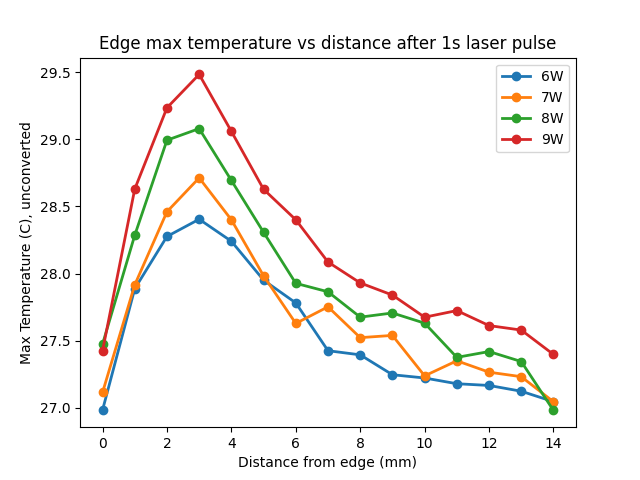

In [165]:
PEAKS_PER_RUN = 15

sets = []

laser_output = 6 # watts
distances = []
peaks = []

for num, peak, in enumerate(peak_indices):
    distances.append(num % PEAKS_PER_RUN)
    peaks.append(peak_properties["peak_heights"][num])

    if (num + 1) % PEAKS_PER_RUN == 0:
        sets.append((laser_output, distances, peaks))
        distances = []
        peaks = []
        laser_output += 1


fig2, ax2 = plt.subplots()
ax2.set_title("Edge max temperature vs distance after 1s laser pulse")
ax2.set_xlabel("Distance from edge (mm)")
ax2.set_ylabel("Max Temperature (C), unconverted")

for dset in sets:
    power, x, y = dset
    ax2.plot(x, y, label=f"{power}W", marker=".", lw=2, markersize=12)

ax2.legend()
plt.show()